In [1]:
#import libraries
import os
import geopandas
import zipfile

In [2]:
#set paths and files of interest
data_path = 'data/source/'

In [3]:
# read zip file
nl17_unzipped = zipfile.ZipFile(data_path + 'nl_1917.zip').extractall()

In [4]:
nl_1917 = geopandas.read_file('nl_1917.shp')

In [5]:
nl_1917

,naam,acode,cbscode,geometry
0,Sluis,10895,713,"POLYGON ((15700.000 371970.000, 16320.000 3712..."
1,Eede,11128,1052,"POLYGON ((18930.000 366130.000, 18920.000 3654..."
2,Sint Kruis,10235,1178,"POLYGON ((25090.000 369760.000, 25070.000 3693..."
3,Aardenburg,11020,648,"POLYGON ((20710.000 366120.000, 20420.000 3653..."
4,Oostburg,10782,692,"POLYGON ((23160.000 374360.000, 22800.000 3734..."
...,...,...,...,...
1115,Finsterwolde,10212,13,"POLYGON ((268850.000 578350.000, 267260.000 57..."
1116,Beerta,11043,6,"POLYGON ((272880.000 585020.000, 276000.000 58..."
1117,Ameland,11153,60,"POLYGON ((193190.000 607770.000, 192240.000 60..."
1118,Schiermonnikoog,10355,88,"POLYGON ((206080.000 608840.000, 205700.000 60..."


In [6]:
# let's add year of observation
nl_1917['jaar']=1917

In [7]:
# check coordinate reference system (projection)
nl_1917.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [8]:
ax = nl_1917.plot()

In [9]:
# let's change the CRS to WGS84 / EPSG:4326
nl_1917 = nl_1917.to_crs("EPSG:4326")

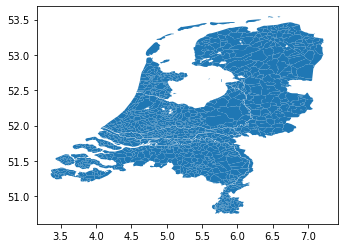

In [10]:
ax = nl_1917.plot()

In [11]:
# write as GeoJSON:
nl_1917.to_file("nl_1917.geojson", driver='GeoJSON')

In [24]:
nl_1917

,naam,acode,cbscode,geometry,jaar
0,Sluis,10895,713,"POLYGON ((3.38879 51.31981, 3.39797 51.31332, ...",1917
1,Eede,11128,1052,"POLYGON ((3.43734 51.26813, 3.43748 51.26157, ...",1917
2,Sint Kruis,10235,1178,"POLYGON ((3.52424 51.30219, 3.52412 51.29823, ...",1917
3,Aardenburg,11020,648,"POLYGON ((3.46284 51.26846, 3.45897 51.26175, ...",1917
4,Oostburg,10782,692,"POLYGON ((3.49487 51.34307, 3.49004 51.33481, ...",1917
...,...,...,...,...,...
1115,Finsterwolde,10212,13,"POLYGON ((7.09020 53.17972, 7.06558 53.15841, ...",1917
1116,Beerta,11043,6,"POLYGON ((7.15290 53.23876, 7.19937 53.23240, ...",1917
1117,Ameland,11153,60,"POLYGON ((5.96208 53.45478, 5.94775 53.45216, ...",1917
1118,Schiermonnikoog,10355,88,"POLYGON ((6.15628 53.46331, 6.15048 53.45931, ...",1917


In [22]:
# bounding box
nl_1917.bounds


,minx,miny,maxx,maxy
0,3.353702,51.256468,3.432969,51.334594
1,3.410987,51.240497,3.522799,51.270190
2,3.462537,51.248119,3.550044,51.309672
3,3.407805,51.261568,3.473744,51.325295
4,3.436557,51.298034,3.494868,51.352974
...,...,...,...,...
1115,7.060606,53.158405,7.168893,53.245728
1116,7.065583,53.138667,7.219586,53.238757
1117,5.612613,53.419796,5.965882,53.465937
1118,6.117209,53.444986,6.336196,53.503308


In [30]:
xmi = min(nl_1917.bounds.minx)
ymi = min(nl_1917.bounds.miny)
xma = min(nl_1917.bounds.maxx)
yma = min(nl_1917.bounds.maxy)
print("Bounding Box Netherlands: " + str(xmi) + ", " + str(ymi), ", " + str(xma), ", " + str(yma))

Bounding Box Netherlands: 3.3537017820117123, 50.75156344980747 , 3.431029206129179 , 50.78326571756671


In [14]:
#### now how to loop the above, for all files in the directory

In [18]:
os.chdir('Dropbox/Gemeentegeschiedenis/')
dirs = os.listdir('./')
dirs

['nl_1958.zip',
 'nl_1964.zip',
 'nl_1970.zip',
 'nl_1838.zip',
 '.Rhistory',
 'nl_1839.zip',
 'nl_1971.zip',
 'nl_1965.zip',
 'nl_1959.zip',
 'nl_1998.zip',
 'nl_1973.zip',
 'nl_1967.zip',
 'nl_1813.zip',
 'nl_1812.zip',
 'nl_1966.zip',
 'nl_1972.zip',
 'nl_1999.zip',
 'nl_1989.zip',
 'nl_1976.zip',
 'nl_1962.zip',
 'nl_1816.zip',
 '.DS_Store',
 'nl_1817.zip',
 'nl_1963.zip',
 'nl_1977.zip',
 'nl_1988.zip',
 'nl_1961.zip',
 'nl_1975.zip',
 'nl_1949.zip',
 'nl_1815.zip',
 'nl_1829.zip',
 'nl_1828.zip',
 'nl_1814.zip',
 'nl_1948.zip',
 'nl_1974.zip',
 'nl_1960.zip',
 'nl_2017.zip',
 'nl_2003.zip',
 'nl_1907.zip',
 'nl_1913.zip',
 'nl_1898.zip',
 'nl_1873.zip',
 'nl_1867.zip',
 'nl_1866.zip',
 'nl_1872.zip',
 'nl_1899.zip',
 'nl_1912.zip',
 'nl_1906.zip',
 'nl_2002.zip',
 'nl_2016.zip',
 'nl_2000.zip',
 'nl_2014.zip',
 'nl_1938.zip',
 'nl_1910.zip',
 'nl_1904.zip',
 'nl_1858.zip',
 'nl_1864.zip',
 'nl_1870.zip',
 'nl_1871.zip',
 'nl_1865.zip',
 'nl_1859.zip',
 'nl_1905.zip',
 'nl_1911.zi

In [16]:
dirs

['.DS_Store',
 'nl_1917.prj',
 'scripts',
 'nl_1917.qix',
 'nl_1917.dbf',
 'nl_1917.shp',
 'nl_1917.cpg',
 '.ipynb_checkpoints',
 'nl_1917.shx',
 'nlgis-notebook.ipynb',
 '.git',
 'nl_1917.geojson',
 'data']